In [1]:
from vmod.source import Penny
from vmod.inverse import Inverse
from vmod import util
import numpy as np
import corner
import matplotlib.pyplot as plt

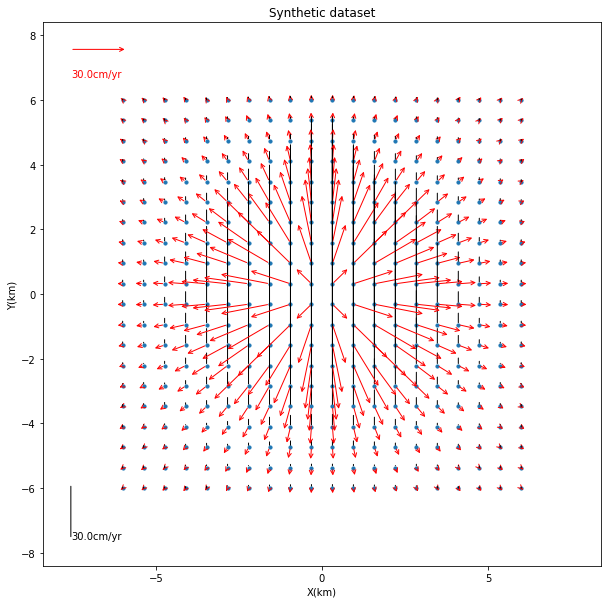

In [2]:
from vmod.data import Gnss

x1=np.linspace(-6000,6000,20)
y1=np.linspace(-6000,6000,20)
X,Y=np.meshgrid(x1,y1)

xgps=X.ravel()
ygps=Y.ravel()

datf = Gnss()
datf.add_xs(xgps)
datf.add_ys(ygps)

#print(dat.ys)

#Penny shaped crack model
penny = Penny(datf)
#Initial parameters [xcen,ycen,depth,pressure(shear),radius]
penny.set_x0(np.array([0, 0, 500, 0.001, 1000]))
#Bounds for parameters [xcen,ycen,depth,pressure(shear),radius]
penny.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0], high_bounds = [10000, 10000, 40000, 0.01, 10000])

inv=Inverse(datf)
inv.register_source(penny)

params=[0, 0, 3000, 0.01, 1000]

datf.add_data(xgps*0,xgps*0,xgps*0)

ux,uy,uz=inv.forward(params,unravel=False)

uxd=ux+np.random.normal(0,np.abs(ux)/4)
uyd=uy+np.random.normal(0,np.abs(uy)/4)
uzd=uz+np.random.normal(0,np.abs(uz)/4)

dat = Gnss()
dat.add_xs(xgps)
dat.add_ys(ygps)

#dat.add_data(uxd,uyd,uzd)
dat.add_data(ux,uy,uz)

util.plot_gnss(xgps,ygps,dat.ux,dat.uy,dat.uz,title='Synthetic dataset',scl=30.0,figsize=(10,10))

In [3]:
from vmod.source import Regdis

reg = Regdis(dat,typ='open',ln=7,wn=7,depth=3e3,length=4e3,width=4e3,lamb=1e-3)
reg.set_x0(0.0)
#Initial parameters [xcen,ycen,depth,length,width,opening,strike,dip]
reg.set_bounds(low_bound = -20, high_bound = 20)

In [4]:
inv=Inverse(dat)
inv.register_source(reg)

In [5]:
ans=inv.nlsq()

0.00015151306823259084


In [6]:
print(ans.x)

[ 0.0211616   0.0211585   0.02115777  0.02115808 -0.10159074 -0.10158122
 -0.10157847 -0.10157969  0.17334672  0.17333415  0.17333093  0.17333484
 -0.10159071 -0.10158156 -0.10157817 -0.10157911  0.41274232  0.41271441
  0.41270181  0.41270547 -0.76158976 -0.76155302 -0.76153844 -0.76154995
  0.17334742  0.17333796  0.17332922  0.17333015 -0.76159308 -0.76156444
 -0.76153341 -0.76153697  4.42121444  4.42117703  4.4211418   4.42115317
 -0.19638932 -0.19637415  0.88228241  0.88223119  8.89563381  8.8956907
 -0.19638692 -0.19637785  0.88227134  0.88224482  8.89564838  8.89567507
 10.09556398]


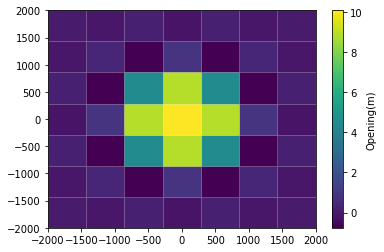

In [7]:
reg.plot_patches(ans.x)

In [5]:
inv.mcmc('regsill')

 [                  0%                  ] 111 of 1100000 complete in 6.0 secHalting at iteration  116  of  1100000


(array([], shape=(4, 0), dtype=float64), <pymc.MCMC.MCMC at 0x7f62d3062970>)

### Synthetic example 2: checkerboard test

3.3065957770095524
This component was already included; it will be replaced


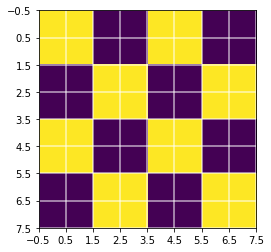

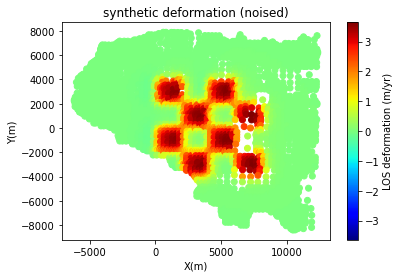

In [1]:
from vmod.source import Penny
from vmod.inverse import Inverse
from vmod import util
import numpy as np
import corner
import matplotlib.pyplot as plt
from vmod.source import Regdis
from vmod.source import Okada

def get_lim(arr):
    max_abs_val = abs(arr[0])
    for elem in arr:
        max_abs_val = max(max_abs_val, abs(elem))
    return max_abs_val

from scipy.stats import gaussian_kde
def get_map(xs):
    kde = gaussian_kde(xs)
    x = np.linspace(np.min(xs), np.max(xs), 1000)
    pdf = kde(x)
    map_value = x[np.argmax(pdf)]
    return map_value

# read in an InSAR data class where we can save our synthetic deformation 
from vmod.data import Insar
csvfile_ref = 'examples/insar/tanaga59_ref.csv'
insarobs         = Insar()
insarobs.importcsv(csvfile_ref,ori=[-178.14,51.85])
print(np.mean(insarobs.az)) 

# create a 4-by-4 checkerboard-shaped fault source 
okada11 = Okada(insarobs)
okada11.set_type('open')
okada11.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada11.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
okada31 = Okada(insarobs)
okada31.set_type('open')
okada31.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada31.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
okada22 = Okada(insarobs)
okada22.set_type('open')
okada22.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada22.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
okada42 = Okada(insarobs)
okada42.set_type('open')
okada42.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada42.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
okada13 = Okada(insarobs)
okada13.set_type('open')
okada13.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada13.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
okada33 = Okada(insarobs)
okada33.set_type('open')
okada33.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada33.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
okada24 = Okada(insarobs)
okada24.set_type('open')
okada24.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada24.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
okada44 = Okada(insarobs)
okada44.set_type('open')
okada44.set_x0(np.array([0, 0, 500, 100, 100, 5, 0, 0]))
okada44.set_bounds(low_bounds = [-10000, -10000, 0, 0, 0, 0, 0, 0], \
                   high_bounds = [10000, 10000, 10000, 1000, 1000, 10, 360, 90])
inv=Inverse(insarobs)
inv.register_source(okada11)
inv.register_source(okada31)
inv.register_source(okada22)
inv.register_source(okada42)
inv.register_source(okada13)
inv.register_source(okada33)
inv.register_source(okada24)
inv.register_source(okada44)

fwd = inv.forward([-3000+4000,  3000, 500, 2000, 2000, 5, 0, 0, 
                    1000+4000,  3000, 500, 2000, 2000, 5, 0, 0, 
                   -1000+4000,  1000, 500, 2000, 2000, 5, 0, 0, 
                    3000+4000,  1000, 500, 2000, 2000, 5, 0, 0, 
                   -3000+4000, -1000, 500, 2000, 2000, 5, 0, 0, 
                    1000+4000, -1000, 500, 2000, 2000, 5, 0, 0, 
                   -1000+4000, -3000, 500, 2000, 2000, 5, 0, 0, 
                    3000+4000, -3000, 500, 2000, 2000, 5, 0, 0],unravel=False)
# optional: add noise 
# sigma = 0.01*max(fwd[0])
# syn_noise = np.random.uniform(-sigma, sigma, len(fwd[0]))
# fwd = fwd[0] + syn_noise
# obs.add_comp(fwd,'los')
insarobs.add_comp(fwd[0],'los')

synmat = np.zeros([8,8]) 
synmat[ 0: 2, 0: 2] = 5 
synmat[ 0: 2, 4: 6] = 5 
synmat[ 2: 4, 2: 4] = 5 
synmat[ 2: 4, 6: 8] = 5 
synmat[ 4: 6, 0: 2] = 5 
synmat[ 4: 6, 4: 6] = 5 
synmat[ 6: 8, 2: 4] = 5 
synmat[ 6: 8, 6: 8] = 5 

# plot the synthetic fault and its deformation response 
plt.imshow(synmat)
plt.grid(color='w', linestyle='-', linewidth=2, alpha=0.5)
plt.xticks(np.arange(-0.5, 8, 1));
plt.yticks(np.arange(-0.5, 8, 1)); 

plt.figure()
plt.title('synthetic deformation (noised)')
data = fwd[0]
plt.scatter( insarobs.xs,insarobs.ys,c=data,cmap='jet',vmin=-get_lim(data),vmax=get_lim(data) )
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.colorbar(label='LOS deformation (m/yr)')
plt.show() 

In [2]:
reg = Regdis(insarobs,typ='open',ln=8,wn=8,xcen=4000,depth=500,length=8000,width=8000,lamb=0.000001)
reg.set_x0(0.0)
#Initial parameters [xcen,ycen,depth,length,width,opening,strike,dip]
reg.set_bounds(low_bound = -20, high_bound = 20)

inv=Inverse(insarobs)
inv.register_source(reg)
# def set_numsteps(self,steps,burnin,thin):
# default is steps=6`600`000, burnin=600`000, thin=1`000
inv.set_numsteps(1000000,10000,100) 

trace,MDL = inv.mcmc('regsill_checker') 

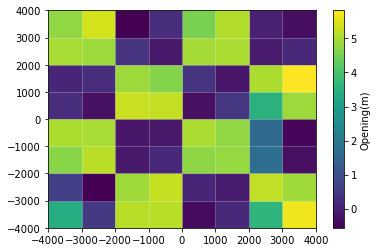

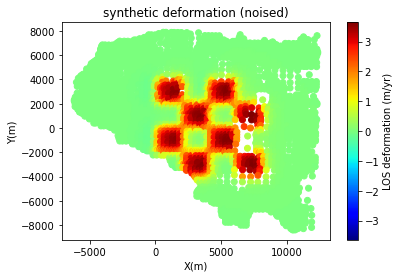

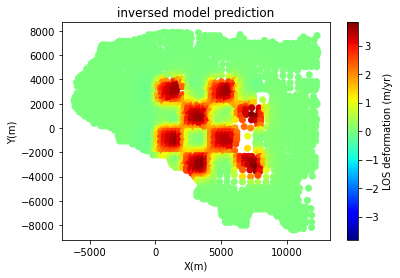

In [3]:
import pickle
with open('regsill_checker.pkl','rb') as handle:
    dic=pickle.load(handle)

trace=[dic[key] for key in dic.keys()]

iopsmean = np.zeros(( np.shape(trace)[0] ,  ))
for i in range(np.shape(trace)[0] ):
    iopsmean[i] = ( np.mean(trace[i]) )

iopsmap = np.zeros(( np.shape(trace)[0] ,  ))
for i in range(np.shape(trace)[0] ):
    iopsmap[i] = ( get_map(trace[i]) )
    
reg.plot_patches(iopsmap)

plt.figure()
plt.title('synthetic deformation (noised)')
data = fwd[0]
plt.scatter( insarobs.xs,insarobs.ys,c=data,cmap='jet',vmin=-get_lim(data),vmax=get_lim(data) )
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.colorbar(label='LOS deformation (m/yr)')
plt.show()

inv=Inverse(insarobs)
oks,params = reg.get_reg_sill(iopsmap)
for ok in oks:
    inv.register_source(ok)
fwd = inv.forward(params,unravel=False)
plt.figure()
plt.title('inversed model prediction')
data = fwd[0]
plt.scatter( insarobs.xs,insarobs.ys,c=data,cmap='jet',vmin=-get_lim(data),vmax=get_lim(data) )
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.colorbar(label='LOS deformation (m/yr)')
plt.show()